# Imports

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

# Read Sample

In [139]:
flights_modified = pd.read_csv(r"../data/sampled_data.csv")
flights_modified.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,arr_date_time,dep_date_time,arr_month
0,2019-01-02,DL,DL_CODESHARE,DL,5303,9E,N606LR,5303,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-02 17:14:00,2019-01-02 15:13:00,1
1,2019-01-25,DL,DL_CODESHARE,DL,5443,9E,N905XJ,5443,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-25 17:18:00,2019-01-25 15:12:00,1
2,2019-01-03,DL,DL_CODESHARE,DL,5187,9E,N195PQ,5187,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-03 23:35:00,2019-01-03 21:30:00,1
3,2019-01-17,DL,DL_CODESHARE,DL,5443,9E,N310PQ,5443,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-17 17:18:00,2019-01-17 15:12:00,1
4,2019-01-29,DL,DL_CODESHARE,DL,5023,9E,N8928A,5023,10397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-29 14:45:00,2019-01-29 13:50:00,1


In [141]:
flights_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754138 entries, 0 to 754137
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              754138 non-null  object 
 1   mkt_unique_carrier   754138 non-null  object 
 2   branded_code_share   754138 non-null  object 
 3   mkt_carrier          754138 non-null  object 
 4   mkt_carrier_fl_num   754138 non-null  int64  
 5   op_unique_carrier    754138 non-null  object 
 6   tail_num             751549 non-null  object 
 7   op_carrier_fl_num    754138 non-null  int64  
 8   origin_airport_id    754138 non-null  int64  
 9   origin               754138 non-null  object 
 10  origin_city_name     754138 non-null  object 
 11  dest_airport_id      754138 non-null  int64  
 12  dest                 754138 non-null  object 
 13  dest_city_name       754138 non-null  object 
 14  crs_dep_time         754138 non-null  int64  
 15  dep_time         

In [145]:
flights_modified = flights_modified.astype({'arr_date_time':'datetime64[ns]','dep_date_time':'datetime64[ns]'})

In [146]:
flights_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754138 entries, 0 to 754137
Data columns (total 45 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   fl_date              754138 non-null  object        
 1   mkt_unique_carrier   754138 non-null  object        
 2   branded_code_share   754138 non-null  object        
 3   mkt_carrier          754138 non-null  object        
 4   mkt_carrier_fl_num   754138 non-null  int64         
 5   op_unique_carrier    754138 non-null  object        
 6   tail_num             751549 non-null  object        
 7   op_carrier_fl_num    754138 non-null  int64         
 8   origin_airport_id    754138 non-null  int64         
 9   origin               754138 non-null  object        
 10  origin_city_name     754138 non-null  object        
 11  dest_airport_id      754138 non-null  int64         
 12  dest                 754138 non-null  object        
 13  dest_city_name

# Feature Engineering

In [159]:
flights_fe = flights_modified.copy()

## Date, hour, week

In [160]:
# flights_modified['arr_year'] = flights_modified['arr_date_time'].dt.year
flights_fe['arr_month'] = flights_fe['arr_date_time'].dt.month
flights_fe['arr_day_of_week'] = flights_fe['arr_date_time'].dt.day_of_week
flights_fe['arr_hour'] = flights_fe['arr_date_time'].dt.hour


# flights_modified['dep_year'] = flights_modified['dep_date_time'].dt.year
# flights_modified['dep_month'] = flights_modified['dep_date_time'].dt.month
# flights_modified['dep_day_of_week'] = flights_modified['dep_date_time'].dt.day_of_week
# flights_modified['dep_hour'] = flights_modified['dep_date_time'].dt.hour

## Airport Type

In [161]:
origin_airport = flights_fe["origin_airport_id"].value_counts()
dest_airport = flights_fe["dest_airport_id"].value_counts()

airports = pd.concat([origin_airport,dest_airport],axis=1)
airports = airports.sort_values(by=["origin_airport_id"],ascending=False)

df1, df2, df3, df4, df5 = np.array_split(airports, 5)

df1["Type"] = "Very Large"
df2["Type"] = "Large"
df3['Type'] = "Medium"
df4["Type"] = "Small"
df5["Type"] = "Very Small"

airport_type = pd.concat([df1,df2,df3,df4,df5]).drop(columns=["origin_airport_id","dest_airport_id"]).to_dict()['Type']

flights_fe["origin_airport_type"] = flights_fe.origin_airport_id.map(lambda x: airport_type[x] )
flights_fe["dest_airport_type"] = flights_fe.dest_airport_id.map(lambda x: airport_type[x] )

In [264]:
flights_fe.to_csv(r"work_on_this.csv",index=False)

## number of inbound flights

In [254]:
from datetime import datetime

In [269]:
def get_num_inbound_flights_carrier(data,minutes=-60,percentages_to_print=[],num_row_processed=[0]):
#     print(num_row_processed)
    if num_row_processed[0] in percentages_to_print:
        print(f"{datetime.now().time()} : {100*num_row_processed[0]/total_num}% rows processed")
    
    num_row_processed[0] = num_row_processed[0]+1
    carrier = data.mkt_unique_carrier
    airport = data.origin_airport_id
    date = data.dep_date_time
    fl_num = data.op_carrier_fl_num
    date_diff = date + timedelta(minutes=minutes)
#     inbound_flight_num = []
    mask = ( 
    (flights_fe.mkt_unique_carrier==carrier) & (flights_fe.dest_airport_id==airport) & 
    (flights_fe.arr_date_time >= date_diff) & (flights_fe.arr_date_time <= date) & (flights_fe.op_carrier_fl_num != fl_num)
       )
    return flights_fe[mask].shape[0]
#     data["num_inbound_flights"] = inbound_flight_num
#     return inbound_flight_num

In [270]:
num_row_processed = [0]
total_num = flights_fe.shape[0]
percentages = np.round(np.linspace(0,total_num,11))
flights_fe["inbound_flights"] = flights_fe.apply(get_num_inbound_flights_carrier,axis=1,percentages_to_print=percentages,num_row_processed = num_row_processed)

05:32:19.069169 : 0.0% rows processed
06:34:54.404303 : 10.000026520345083% rows processed
07:33:44.414724 : 20.000053040690165% rows processed
08:37:01.860405 : 29.999946959309835% rows processed
09:41:03.836158 : 39.99997347965492% rows processed
10:49:11.702286 : 50.0% rows processed
11:54:04.992385 : 60.00002652034508% rows processed
13:00:49.445227 : 70.00005304069016% rows processed
14:06:54.264452 : 79.99994695930984% rows processed
15:16:57.414459 : 89.99997347965491% rows processed


In [271]:
flights_fe.shape

(754138, 50)

In [272]:
flights_fe.to_csv(r"../data/sample_with_inbound_data.csv",index=False)

## Weather

# Drop Columns

In [ ]:
flights_dropped = flights_fe.copy()

In [ ]:
test_columns = ["mkt_unique_carrier","branded_code_share",
               "mkt_carrier","mkt_carrier_fl_num",
               "op_unique_carrier","tail_num","op_carrier_fl_num",
               "origin_airport_id","origin","origin_city_name",
               "dest_airport_id","dest","dest_city_name","crs_elapsed_time",
               "flights","distance","arr_delay","arr_date_time","dep_date_time"]

columns_to_drop = set(flights_dropped.columns).difference(set(test_columns))
flights_dropped = flights_dropped.drop(columns=columns_to_drop)

In [ ]:
repetitive_columns = ["branded_code_share","mkt_carrier","tail_num","mkt_carrier_fl_num",
                      "origin","origin_city_name","dest","dest_city_name","flights"]
flights_dropped = flights_dropped.drop(columns=repetitive_columns)

In [ ]:
flights_dropped  = flights_dropped.drop(columns=["arr_date_time","dep_date_time"])
flights_dropped.head()

# Missing values

In [81]:
flights_no_missing = flights_modified.dropna()

In [82]:
X,y = flights_no_missing.drop(columns=["arr_delay"]), flights_no_missing["arr_delay"]

In [83]:
X.head()

,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,crs_elapsed_time,distance,arr_month,arr_day_of_week,arr_hour,origin_airport_type,dest_airport_type
0,DL,9E,5303,121.0,692.0,1,2,17,Very Large,Large
1,DL,9E,5443,126.0,692.0,1,4,17,Very Large,Large
2,DL,9E,5187,125.0,692.0,1,3,23,Very Large,Large
3,DL,9E,5443,126.0,692.0,1,3,17,Very Large,Large
5,DL,9E,5010,113.0,500.0,1,6,17,Very Large,Medium


In [84]:
X.shape

(738029, 10)

<AxesSubplot:>

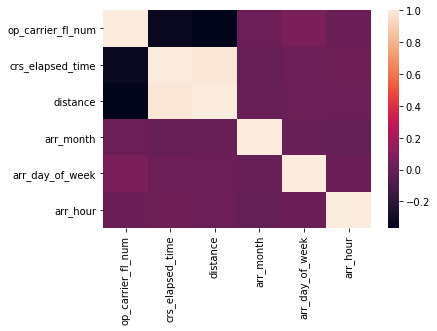

In [85]:
sns.heatmap(X.corr())

In [86]:
X.drop(columns=["arr_month","arr_day_of_week","arr_hour"],inplace=True)

# Preprocessing

In [114]:
X_dummy = X.drop(columns=["op_carrier_fl_num"])

In [115]:
X_dummy = pd.get_dummies(data=X_dummy,columns=["mkt_unique_carrier","op_unique_carrier","origin_airport_type",
                                              "dest_airport_type"])

In [116]:
X_dummy.shape

(738029, 48)

# Model

In [117]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X_dummy,y,train_size=0.7,random_state=1234)

In [119]:
# X_train = StandardScaler().fit_transform(X_train)
# X_test = StandardScaler().fit_transform(X_test)

In [120]:
reg = LinearRegression()
model = GridSearchCV(reg,param_grid={})
model.fit(X_train,y_train)

GridSearchCV(estimator=LinearRegression(), param_grid={})

In [121]:
y_pred = model.predict(X_test)

In [122]:
print(r2_score(y_test,y_pred))

0.005969444783164413


In [104]:
print(mean_squared_error(y_test,y_pred))

2673.8956387244293


In [105]:
print(mean_absolute_error(y_test,y_pred))

25.21647273810712


# Feature Reduction

In [70]:
from sklearn.decomposition import PCA

In [78]:
X_scaled = StandardScaler().fit_transform(X)

In [80]:
pca = PCA(n_components=len(X.columns))
pca.fit(X_scaled)

PCA(n_components=50)

In [81]:
pca.explained_variance_ratio_.cumsum()

array([0.06401608, 0.11578881, 0.16473185, 0.21140162, 0.25611906,
       0.30017578, 0.34382995, 0.38729323, 0.43070383, 0.47317132,
       0.51542511, 0.55537564, 0.59137913, 0.61736711, 0.64247181,
       0.66536188, 0.6878839 , 0.71020639, 0.73232705, 0.75433606,
       0.77613126, 0.79778578, 0.81937622, 0.84091085, 0.86240036,
       0.88384086, 0.9051753 , 0.92646569, 0.9473383 , 0.96606164,
       0.98192176, 0.9883666 , 0.99254804, 0.99581082, 0.99827046,
       0.99969563, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [87]:
pca = PCA(n_components=32)
X_pca = pd.DataFrame(pca.fit_transform(X_scaled),columns=[f"PCA_{value}" for value in range(1,33)])

## Model

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,train_size=0.7,random_state=1234)

In [89]:
reg = LinearRegression()
model = GridSearchCV(reg,param_grid={})
model.fit(X_train,y_train)

GridSearchCV(estimator=LinearRegression(), param_grid={})

In [90]:
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.01553651913357923
